## Pair Programming - Regresión logística 2

### Procesado

---

In [27]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Gestión datos desbalanceados

from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
from sklearn.model_selection import train_test_split

#  Configuración de warnings
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('../archivos/travel_enco_stand_sin_balanceo.csv', index_col=0)
df.head()

,product_name,claim,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,...,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS
0,3,0,-29.0,9.57,6,3,5,-1.423021,-0.053718,0,...,0,0,0,0,1,1,0,1,0,0
1,3,0,-29.0,9.57,6,3,5,-1.423021,-0.053718,0,...,0,0,0,0,1,1,0,1,0,0
2,12,0,-49.5,29.70,4,5,8,-1.829379,0.919850,0,...,0,0,0,0,1,0,1,0,0,1
3,12,0,-39.6,23.76,4,5,8,-1.633138,0.632567,0,...,0,0,0,0,1,0,1,0,0,1
4,12,0,-19.8,11.88,5,6,8,-1.240655,0.058003,0,...,0,0,0,0,1,0,1,0,0,1


In [29]:
df.shape

(55284, 32)

### 1. Chequear si los datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.

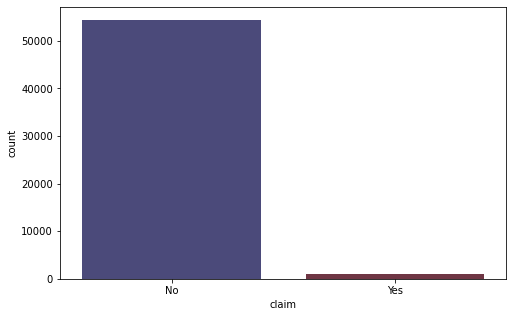

In [30]:
plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = "claim", palette = 'icefire')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

In [31]:
#Porcentajes variable respuesta
df["claim"].value_counts() *100 / df.shape[0]

0    98.334057
1     1.665943
Name: claim, dtype: float64

### 3.1. Utilizamos el método SMOTE para balancear la variable respuesta.

In [32]:
# Separamos la variable respuesta de las predictoras
y = df['claim']
X = df.drop('claim', axis=1)

In [33]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [34]:
# iniciamos el método y usaremos "sampling_strategy" para limitar el número de "datos nuevos" y muchos más duplicados
os_us = SMOTETomek(sampling_strategy= 0.4)

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [35]:
X_train_res.head()

,product_name,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,agency_ART,...,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS
0,11,33.0,11.55,6,5,5,-0.194035,0.042042,0,0,...,0,0,0,1,0,0,1,1,0,0
1,11,56.0,19.60,6,6,8,0.261879,0.431373,0,0,...,0,0,0,1,0,0,1,0,1,0
2,11,22.0,7.70,6,6,8,-0.412081,-0.144159,0,0,...,0,0,0,1,0,0,1,1,0,0
3,8,23.0,9.20,6,5,6,-0.392259,-0.071613,0,0,...,0,0,0,1,0,0,1,0,0,1
4,14,72.0,0.00,6,6,7,0.579036,-0.516562,0,0,...,0,0,0,0,1,0,1,0,0,1


In [36]:
y_train.value_counts()

0    38045
1      653
Name: claim, dtype: int64

In [37]:
y_train_res.value_counts()

0    37978
1    15151
Name: claim, dtype: int64

In [38]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Distribution before resampling 
 0    38045
1      653
Name: claim, dtype: int64
..............................................................
Distribución después del ajuste 
 0    37978
1    15151
Name: claim, dtype: int64


In [39]:
df_balanceado = pd.concat([X_train_res, y_train_res], axis = 1)
df_balanceado.tail()

,product_name,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,agency_ART,...,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS,claim
53124,10,39.525629,11.983923,6,5,8,-0.064682,0.063029,0,0,...,0,0,1,0,0,1,0,1,0,1
53125,12,59.400000,35.640000,3,5,4,0.329275,1.207132,0,0,...,0,0,0,1,0,1,0,0,1,1
53126,10,34.462031,8.620508,6,5,7,-0.165054,-0.099640,0,0,...,0,0,1,0,0,1,1,0,0,1
53127,8,81.088194,20.277048,6,5,7,0.759186,0.464118,0,0,...,0,0,1,0,0,1,0,1,0,1
53128,13,112.000000,0.000000,3,6,8,1.371930,-0.516562,0,0,...,0,0,0,1,0,1,0,0,1,1


In [40]:
df_balanceado.claim.value_counts()

0    37978
1    15151
Name: claim, dtype: int64

In [44]:
# comprobamos duplicados
df_balanceado.duplicated().sum()

33669

Como tenemos muchos duplicados los eliminaremos y volveremos a repetir el proceso

In [42]:
df_balanceado.drop_duplicates()

,product_name,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,agency_ART,...,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS,claim
0,11,33.000000,11.550000,6,5,5,-0.194035,0.042042,0,0,...,0,0,1,0,0,1,1,0,0,0
1,11,56.000000,19.600000,6,6,8,0.261879,0.431373,0,0,...,0,0,1,0,0,1,0,1,0,0
2,11,22.000000,7.700000,6,6,8,-0.412081,-0.144159,0,0,...,0,0,1,0,0,1,1,0,0,0
3,8,23.000000,9.200000,6,5,6,-0.392259,-0.071613,0,0,...,0,0,1,0,0,1,0,0,1,0
4,14,72.000000,0.000000,6,6,7,0.579036,-0.516562,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53122,7,24.544966,6.140792,6,5,6,-0.361634,-0.219569,0,0,...,0,0,1,0,0,1,0,0,0,1
53123,10,26.183408,6.545852,6,6,6,-0.329156,-0.199978,0,0,...,0,0,1,0,0,1,1,0,0,1
53124,10,39.525629,11.983923,6,5,8,-0.064682,0.063029,0,0,...,0,0,1,0,0,1,0,1,0,1
53126,10,34.462031,8.620508,6,5,7,-0.165054,-0.099640,0,0,...,0,0,1,0,0,1,1,0,0,1


### 4. Guardad el dataframe.

In [46]:
df_balanceado.to_csv('../archivos/travel_balanceado.csv')